In [280]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

# import metrics MRL
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [281]:
tabla=pd.read_csv(r"C:\Users\Usuario\Documents\Python Scripts\iris_dataset.csv",delimiter=",")
iris=pd.DataFrame(tabla)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [282]:
iris.groupby('target').size()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [283]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [284]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

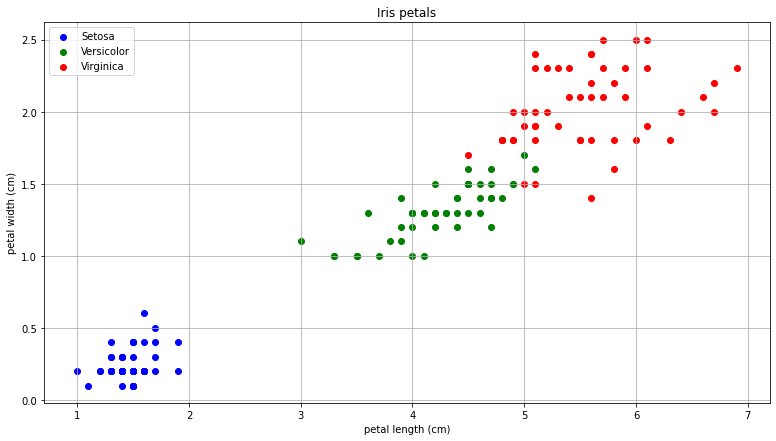

In [285]:
import matplotlib.pyplot as plt

setosa = iris[iris.target == "Iris-setosa"]
versicolor = iris[iris.target=='Iris-versicolor']
virginica = iris[iris.target=='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [286]:
# 2. Splitting data for training and testing
from sklearn.model_selection import train_test_split
x=pd.DataFrame(iris,columns=['petal length (cm)','petal width (cm)'])      # dataset.data
y=pd.DataFrame(iris,columns=['target']) # dataset.target 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [287]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (120, 2)
y_train shape: (120, 1)
x_test shape: (30, 2)
y_test shape: (30, 1)


In [288]:
#3. Training the model. Classification models.
# model=DecisionTreeClassifier()
# model=RandomForestClassifier()
model=GaussianNB()
model.fit(x_train, y_train)

predictions=model.predict(x_test)
predictions=pd.DataFrame(predictions)
predictions=np.array(predictions,dtype=object)
predictions

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica']], dtype=object)

In [289]:
# Se crea un dataframe para comparar las predicciones con el valor real
#df_predicciones=pd.DataFrame({'poverty_index':y_test,'PRED':predictions})
df_predicciones=pd.DataFrame(predictions, y_test)
df_predicciones

,0
"(Iris-setosa,)",Iris-setosa
"(Iris-versicolor,)",Iris-versicolor
"(Iris-versicolor,)",Iris-versicolor
"(Iris-setosa,)",Iris-setosa
"(Iris-virginica,)",Iris-virginica
"(Iris-versicolor,)",Iris-versicolor
"(Iris-virginica,)",Iris-virginica
"(Iris-setosa,)",Iris-setosa
"(Iris-setosa,)",Iris-setosa
"(Iris-virginica,)",Iris-virginica


In [290]:
#5. Evaluate predictions
print("Accuracy on test set: ",round(accuracy_score(y_test, predictions),2))

Accuracy on test set:  0.97


In [291]:
 #Muestra matriz de confusion
# Crea MC
confusion_matrix=metrics.confusion_matrix(y_test, predictions)
confusion_matrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

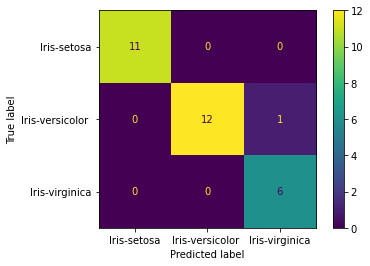

In [292]:

#Visauliza MC
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = ['Iris-setosa','Iris-versicolor ','Iris-virginica'])
cm_display.plot()
plt.show()

In [293]:
# Metricas de la clasificacion
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [338]:
######################################################################################################################
                                                 #####  MODELO DE REGRESION LINEAL SIMPLE ######
######################################################################################################################

# "...se quiere predecir el ancho del petalo 'petal width' en relacion al largo del petalo 'petal length'..."

#  Splitting data for training and testing
from sklearn.model_selection import train_test_split
x2=pd.DataFrame(iris,columns=['petal length (cm)'])      
y2=pd.DataFrame(iris,columns=['petal width (cm)']) 

#Particion del dataset con 20% datos para el conjunto de testing, 80% entrenamiento
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2, random_state=1)
x_test2


,petal length (cm)
14,1.2
98,3.0
75,4.4
16,1.3
131,6.4
56,4.7
141,5.1
44,1.9
29,1.6
120,5.7


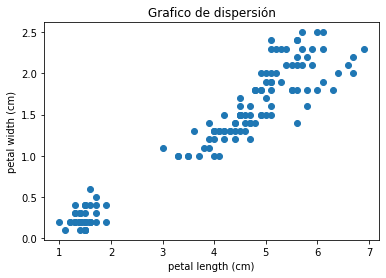

In [339]:
# Graficar la recta de regresion del modelo predictivo
plt.scatter(x2,y2)
# plt.plot(x2,y2,'r')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Grafico de dispersión')
plt.show()

In [340]:

print("x_train shape:",x_train2.shape)
print("y_train shape:",y_train2.shape)
print("x_test shape:",x_test2.shape)
print("y_test shape:",y_test2.shape)

x_train shape: (120, 1)
y_train shape: (120, 1)
x_test shape: (30, 1)
y_test shape: (30, 1)


In [341]:
# TRAINING THE MODEL. Regression models.
# model=DecisionTreeClassifier()
# model=RandomForestClassifier()
model2=LinearRegression()
model2.fit(x_train2, y_train2)

predictions2=model2.predict(x_test2)
#predictions2=pd.DataFrame(predictions2)
predictions2=np.array(predictions2,dtype=float)
predictions2

array([[0.11467953],
       [0.87557714],
       [1.46738639],
       [0.15695162],
       [2.31282819],
       [1.59420266],
       [1.76329102],
       [0.41058415],
       [0.28376789],
       [2.01692356],
       [1.38284222],
       [0.32603998],
       [2.10146774],
       [1.50965848],
       [1.50965848],
       [0.15695162],
       [1.29829804],
       [1.50965848],
       [0.2414958 ],
       [0.11467953],
       [1.46738639],
       [1.50965848],
       [1.72101893],
       [0.15695162],
       [2.14373983],
       [1.34057013],
       [0.19922371],
       [0.2414958 ],
       [1.59420266],
       [1.72101893]])

In [342]:
# parametros del modelo de regresión lineal
model2.get_params() 

# copy_X: por default es TRUE para que copie el resultado.
# fit_intercept: por default es TRUE. Calcula el coef. para el modelo.
# n_jobs: por default NONE. Numero de funcionalidades para el proyecto.
# normalize: por default es "deprecated" , significa discontnuado o no disponible.
# positive: fuerza al coef. para que sea positivo.

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [343]:
# Obtenemos el coeficiente del modelo: la pendiente
a=model2.coef_
print("El valor del coeficiente es: ", a )

El valor del coeficiente es:  [[0.4227209]]


In [344]:
# la intercepcion con el eje y (orddenada al origen)
b=model2.intercept_
print("El valor del término independiente es:", b)

El valor del término independiente es: [-0.39258555]


In [345]:
print("La ecuación lineal es: y=", a,"* X","+",b)

La ecuación lineal es: y= [[0.4227209]] * X + [-0.39258555]


In [346]:
# por ejemplo sea x_test2: 1.2 el valor de la prediccion es
y_pred=0.422*(1.2)-0.3925
print(" La prediccion del ancho del petalo es:", round(y_pred,4))

 La prediccion del ancho del petalo es: 0.1139


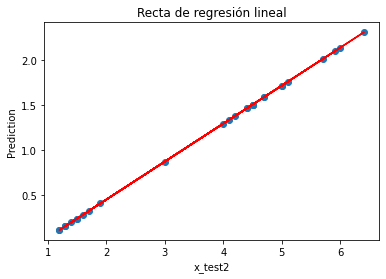

In [347]:
# Graficar la recta de regresion del modelo predictivo
plt.scatter(x_test2,predictions2)
plt.plot(x_test2,predictions2,'r')
plt.xlabel('x_test2')
plt.ylabel('Prediction')
plt.title('Recta de regresión lineal')
plt.show()

In [348]:
y_test2=np.array(y_test2,dtype=float)
y_test2


array([[0.2],
       [1.1],
       [1.4],
       [0.4],
       [2. ],
       [1.6],
       [2.3],
       [0.4],
       [0.2],
       [2.3],
       [1.3],
       [0.4],
       [2.1],
       [1.5],
       [1.5],
       [0.2],
       [1.2],
       [1.5],
       [0.4],
       [0.2],
       [1.2],
       [1.5],
       [1.7],
       [0.3],
       [1.8],
       [1.3],
       [0.2],
       [0.3],
       [1.2],
       [1.9]])

In [349]:
# Se crea un dataframe para comparar las predicciones con el valor real
#df_predicciones=pd.DataFrame({'poverty_index':y_test,'PRED':predictions})
pd.DataFrame({'Valor_Real':y_test2.flatten(), 'Valor_Pred':predictions2.flatten()})


,Valor_Real,Valor_Pred
0,0.2,0.114680
1,1.1,0.875577
2,1.4,1.467386
3,0.4,0.156952
4,2.0,2.312828
5,1.6,1.594203
6,2.3,1.763291
7,0.4,0.410584
8,0.2,0.283768
9,2.3,2.016924


In [350]:
# METRICAS. Evaluate predictions
yt2=y_test2.flatten()
pd2=predictions2.flatten()

mae=mean_absolute_error(yt2,pd2)  # var. rpta. del conjunto de testing y de la prediccion 
mse=mean_squared_error(yt2,pd2)
rmse=mse**(1/2.0)
# El Error absoluto promedio
print("The mean absolte error (MAE) on test set: {:.5f}".format(mae))  

# Error cuadrático promedio
print("The mean squared error (MSE) on test set: {:.4f}".format(mse)) 

# Raiz cuadrada del error cuadrático medio
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse)) # raiz cuadrada del error cuadratico medio

# R2 Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(yt2,pd2))

The mean absolte error (MAE) on test set: 0.12944
The mean squared error (MSE) on test set: 0.0351
The root mean squared error (RMSE) on test set: 0.1875
Variance score: 0.93
